### CONSTANTS

In [1]:
PATHES = ['data/X_train.csv', 'data/X_test.csv', 'data/y_train.csv', 'data/y_test.csv']
SCALER_PATH = "models/standard_scaler.pickle.dat"
NUMERICAL_FEATURES = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
                       'Torque [Nm]', 'Tool wear [min]', 'feature_1', 'feature_2', 'feature_3', 'feature_4']

### Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler, SMOTE

import pickle
import warnings
warnings.filterwarnings('ignore')

### Functions

In [3]:
def get_train_test_data(pathes):
    data = []
    for path in pathes:
        df = pd.read_csv(path)
        data.append(df)
    return data

### Reading Data and Scaler

In [4]:
X_train, X_test, y_train, y_test = get_train_test_data(PATHES)
scaler = pickle.load(open(SCALER_PATH, "rb"))
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')
print(f'Data Scaler: {scaler}')

X_train shape: (8000, 12)
X_test shape: (2000, 12)
y_train shape: (8000, 1)
y_test shape: (2000, 1)
Data Scaler: StandardScaler()


In [5]:
X_train_scaled = X_train.copy()
X_train_scaled[NUMERICAL_FEATURES] = scaler.transform(X_train_scaled[NUMERICAL_FEATURES])
X_test_scaled = X_test.copy()
X_test_scaled[NUMERICAL_FEATURES] = scaler.transform(X_test_scaled[NUMERICAL_FEATURES])

### 01. Logistic Regression

In [6]:
estimator = LogisticRegression(solver='newton-cholesky', penalty='l2')
estimator.fit(X_train_scaled, y_train)
y_pred_train = estimator.predict(X_train_scaled)
y_pred_test = estimator.predict(X_test_scaled)
print('Train Confusion Matrix:\n', confusion_matrix(y_pred=y_pred_train, y_true=y_train))
print('Test Confusion Matrix:\n', confusion_matrix(y_pred=y_pred_test, y_true=y_test))
print('Test Classification report:\n', classification_report(y_pred=y_pred_test, y_true=y_test))

Train Confusion Matrix:
 [[7708   21]
 [ 202   69]]
Test Confusion Matrix:
 [[1922   10]
 [  51   17]]
Test Classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1932
           1       0.63      0.25      0.36        68

    accuracy                           0.97      2000
   macro avg       0.80      0.62      0.67      2000
weighted avg       0.96      0.97      0.96      2000



### 02. Support Victor (Linear)

In [8]:
estimator = SVC(kernel='linear')
estimator.fit(X_train_scaled, y_train)
y_pred_train = estimator.predict(X_train_scaled)
y_pred_test = estimator.predict(X_test_scaled)
print('Train Confusion Matrix:\n', confusion_matrix(y_pred=y_pred_train, y_true=y_train))
print('Test Confusion Matrix:\n', confusion_matrix(y_pred=y_pred_test, y_true=y_test))
print('Test Classification report:\n', classification_report(y_pred=y_pred_test, y_true=y_test))

Train Confusion Matrix:
 [[7729    0]
 [ 265    6]]
Test Confusion Matrix:
 [[1932    0]
 [  68    0]]
Test Classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       0.00      0.00      0.00        68

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.93      0.97      0.95      2000



### 03. Support Victor (non-linear)

In [9]:
estimator = SVC(kernel='rbf', C=1000, gamma=0.1)
estimator.fit(X_train_scaled, y_train)
y_pred_train = estimator.predict(X_train_scaled)
y_pred_test = estimator.predict(X_test_scaled)
print('Train Confusion Matrix:\n', confusion_matrix(y_pred=y_pred_train, y_true=y_train))
print('Test Confusion Matrix:\n', confusion_matrix(y_pred=y_pred_test, y_true=y_test))
print('Test Classification report:\n', classification_report(y_pred=y_pred_test, y_true=y_test))

Train Confusion Matrix:
 [[7723    6]
 [  37  234]]
Test Confusion Matrix:
 [[1921   11]
 [  19   49]]
Test Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1932
           1       0.82      0.72      0.77        68

    accuracy                           0.98      2000
   macro avg       0.90      0.86      0.88      2000
weighted avg       0.98      0.98      0.98      2000



### 04. Random Forest

In [10]:
estimator = RandomForestClassifier(n_estimators=300)
estimator.fit(X_train, y_train)
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
print('Train Confusion Matrix:\n', confusion_matrix(y_pred=y_pred_train, y_true=y_train))
print('Test Confusion Matrix:\n', confusion_matrix(y_pred=y_pred_test, y_true=y_test))
print('Test Classification report:\n', classification_report(y_pred=y_pred_test, y_true=y_test))

Train Confusion Matrix:
 [[7729    0]
 [   0  271]]
Test Confusion Matrix:
 [[1928    4]
 [  21   47]]
Test Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.92      0.69      0.79        68

    accuracy                           0.99      2000
   macro avg       0.96      0.84      0.89      2000
weighted avg       0.99      0.99      0.99      2000



### 05. XGBoost

In [11]:
estimator = XGBClassifier(max_depth=7)
estimator.fit(X_train.values, y_train)
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
print('Train Confusion Matrix:\n', confusion_matrix(y_pred=y_pred_train, y_true=y_train))
print('Test Confusion Matrix:\n', confusion_matrix(y_pred=y_pred_test, y_true=y_test))
print('Test Classification report:\n', classification_report(y_pred=y_pred_test, y_true=y_test))

Train Confusion Matrix:
 [[7729    0]
 [   0  271]]
Test Confusion Matrix:
 [[1928    4]
 [  22   46]]
Test Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.92      0.68      0.78        68

    accuracy                           0.99      2000
   macro avg       0.95      0.84      0.89      2000
weighted avg       0.99      0.99      0.99      2000



### 06. XGBoost with Random Over Sampling

In [14]:
over_sampler = RandomOverSampler()
X_train_, y_train_ = over_sampler.fit_resample(X_train, y_train)
estimator = XGBClassifier(max_depth=7)
estimator.fit(X_train_.values, y_train_)
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
print('Train Confusion Matrix:\n', confusion_matrix(y_pred=y_pred_train, y_true=y_train))
print('Test Confusion Matrix:\n', confusion_matrix(y_pred=y_pred_test, y_true=y_test))
print('Test Classification report:\n', classification_report(y_pred=y_pred_test, y_true=y_test))

Train Confusion Matrix:
 [[7729    0]
 [   0  271]]
Test Confusion Matrix:
 [[1919   13]
 [  16   52]]
Test Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1932
           1       0.80      0.76      0.78        68

    accuracy                           0.99      2000
   macro avg       0.90      0.88      0.89      2000
weighted avg       0.99      0.99      0.99      2000



### 07. XGBoost with SMOTE

In [15]:
smote = SMOTE()
X_train_, y_train_ = smote.fit_resample(X_train, y_train)
estimator = XGBClassifier(max_depth=7)
estimator.fit(X_train_.values, y_train_)
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
print('Train Confusion Matrix:\n', confusion_matrix(y_pred=y_pred_train, y_true=y_train))
print('Test Confusion Matrix:\n', confusion_matrix(y_pred=y_pred_test, y_true=y_test))
print('Test Classification report:\n', classification_report(y_pred=y_pred_test, y_true=y_test))

Train Confusion Matrix:
 [[7729    0]
 [   0  271]]
Test Confusion Matrix:
 [[1906   26]
 [  16   52]]
Test Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1932
           1       0.67      0.76      0.71        68

    accuracy                           0.98      2000
   macro avg       0.83      0.88      0.85      2000
weighted avg       0.98      0.98      0.98      2000



### 08. Best Model XGBoost with Random Over Sampler

In [17]:
over_sampler = RandomOverSampler()
X_train_, y_train_ = over_sampler.fit_resample(X_train, y_train)
estimator = XGBClassifier(max_depth=7)
estimator.fit(X_train_.values, y_train_)
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
train_cm = confusion_matrix(y_pred=y_pred_train, y_true=y_train)
test_cm = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
print('Train Confusion Matrix:\n', train_cm)
print('Test Confusion Matrix:\n', test_cm)
print('Test Classification report:\n', classification_report(y_pred=y_pred_test, y_true=y_test))

Train Confusion Matrix:
 [[7729    0]
 [   0  271]]
Test Confusion Matrix:
 [[1919   13]
 [  16   52]]
Test Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1932
           1       0.80      0.76      0.78        68

    accuracy                           0.99      2000
   macro avg       0.90      0.88      0.89      2000
weighted avg       0.99      0.99      0.99      2000



Text(0.5, 1.0, 'Train Confusion Matrix')

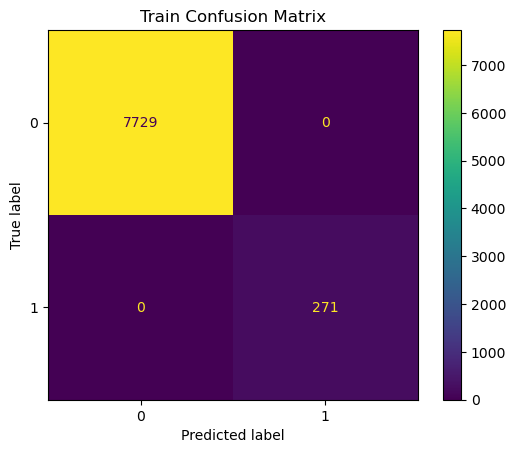

In [18]:
disp_train_cm = ConfusionMatrixDisplay(train_cm, display_labels=estimator.classes_)
disp_train_cm.plot()
plt.title('Train Confusion Matrix')


Text(0.5, 1.0, 'Test Confusion Matrix')

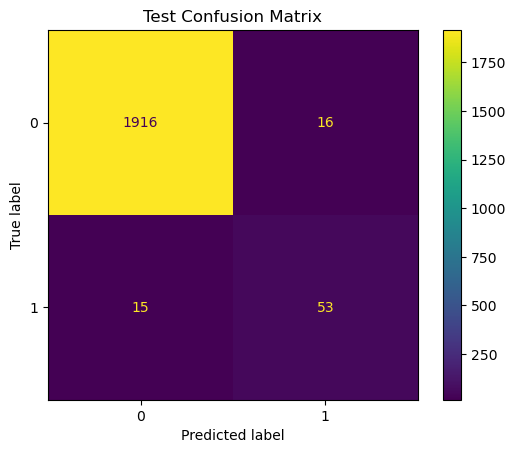

In [29]:
disp_test_cm = ConfusionMatrixDisplay(test_cm, display_labels=estimator.classes_)
disp_test_cm.plot()
plt.title('Test Confusion Matrix')


### 09. Exporting Best Model

In [19]:
pickle.dump(estimator, open("models/xgboost.pickle.dat", "wb"))